Source: 1) https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/; 2) https://timeseriesreasoning.com/contents/partial-auto-correlation/

## AR completion from scratch.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
pd.options.mode.chained_assignment = None  # default='warn'

/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/Cam/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df=pd.read_csv('AMZN.csv', parse_dates=['Date'], index_col=['Date'], dayfirst=True)
df.columns=['Close']
df

,Close
Date,
2021-01-04,3186.629883
2021-01-05,3218.510010
2021-01-06,3138.379883
2021-01-07,3162.159912
2021-01-08,3182.699951
...,...
2021-12-23,3421.370117
2021-12-27,3393.389893
2021-12-28,3413.219971


### Equation for AR model : <br>
$Y_{t}=c+\sum_{i=1}^{p} \varphi_{i} Y_{t-i}+\varepsilon_{t}=c+\varphi_{1} Y_{t-1}+\varphi_{2} Y_{t-2}+\ldots \ldots \ldots \ldots \ldots+\varphi_{p} Y_{t-p}+\varepsilon_{t}$

In [3]:
def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Close'].shift(i)

  #train size = 0.7, test size = 0.3
  train_size = (int)(0.7 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Close'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]

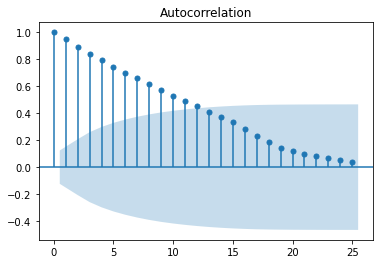

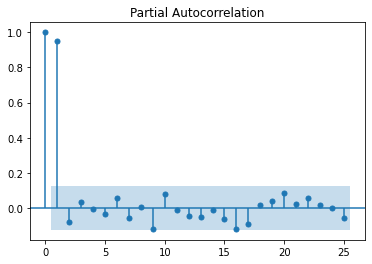

In [4]:
ACF = plot_acf(df.Close.dropna(),lags=25)
# with the PACF, we can figure out how many lags we need in the AR model.
PACF = plot_pacf(df.Close.dropna(),lags=25)

From the above figure of PACF, we can use 2 as the lag number.

In [5]:
lag_num = 2

#Step 2 : Fitting AR Model

We calculate the error on the test-set for each p, and pick the best one.

In [6]:
lag_num = 1
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

The RMSE is : 51.723358607050784 , Value of p :  1


In [7]:
lag_num = 2
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

The RMSE is : 51.82451180050663 , Value of p :  2


In [8]:
lag_num = 3
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

The RMSE is : 51.65674852167227 , Value of p :  3


In [15]:
lag_num = 4
[df_train,df_test,theta,intercept,RMSE] = AR(lag_num,pd.DataFrame(df.Close))

The RMSE is : 52.19897954871848 , Value of p :  4


<AxesSubplot:xlabel='Date'>

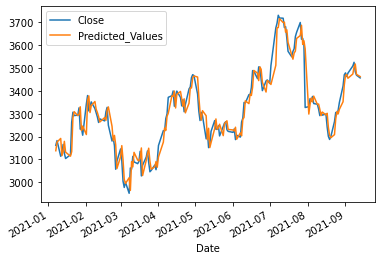

In [9]:
df_train[['Close','Predicted_Values']].plot()

<AxesSubplot:xlabel='Date'>

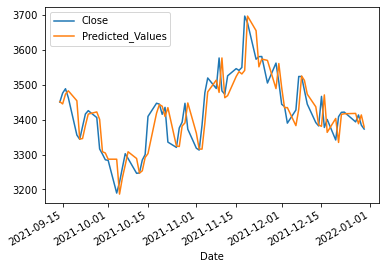

In [10]:
df_test[['Close','Predicted_Values']].plot()